In [1]:
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import os
import math
import numpy as np 
import pandas as pd
import yfinance as yf

In [73]:
ticker='aapl'
input_dir = os.getcwd()
output_file = os.path.join(input_dir, ticker + '_weekly_return_volatility5.csv')

try:
    df = yf.download(ticker, start="2018-01-01", end="2022-12-31")
    df['Return'] = df['Adj Close'].pct_change()
    df['Return'].fillna(0, inplace = True)
    df['Return'] = 100.0 * df['Return']
    df['Return'] = df['Return'].round(3)        
    df['Date'] = df.index
    df['Date'] = pd.to_datetime(df['Date'])
    df['Week_Number'] = df['Date'].dt.strftime('%U')
    df['Year'] = df['Date'].dt.year 
    df['Day'] = df['Date'].dt.day
    df['Weekday'] = df['Date'].dt.day_name()
    df_2 = df[['Year', 'Week_Number', 'Return']]
    df_2.index = range(len(df))
    df_grouped = df_2.groupby(['Year', 'Week_Number'])['Return'].agg([np.mean, np.std])
    df_grouped.reset_index(['Year', 'Week_Number'], inplace=True)
    df_grouped.rename(columns={'mean': 'mean_return', 'std':'volatility'}, inplace=True)
    df_grouped.fillna(0, inplace=True)
    df_grouped.to_csv(output_file, index=False)
    print("wrote ", len(df_grouped), " lines to file: ", output_file)

#    df_grouped_2 = df_grouped.fillna(0)
#    df_grouped_2.to_csv(output_file, index=False)
    
except Exception as e:
    print(e)


output_file = os.path.join(input_dir, ticker + '_weekly_return_detailed5.csv')
combined_df = df.merge(df_grouped, on=['Year', 'Week_Number'], how = 'inner')
combined_df.to_csv(output_file, index=False)
print("\n wrote ", len(combined_df), " lines to file to ", output_file)

[*********************100%%**********************]  1 of 1 completed
wrote  263  lines to file:  C:\Users\18249\Assignment\aapl_weekly_return_volatility5.csv

 wrote  1259  lines to file to  C:\Users\18249\Assignment\aapl_weekly_return_detailed5.csv


In [74]:
ticker='spy'
input_dir = os.getcwd()
output_file = os.path.join(input_dir, ticker + '_weekly_return_volatility5.csv')

try:
    df = yf.download(ticker, start="2018-01-01", end="2022-12-31")
    df['Return'] = df['Adj Close'].pct_change()
    df['Return'].fillna(0, inplace = True)
    df['Return'] = 100.0 * df['Return']
    df['Return'] = df['Return'].round(3)        
    df['Date'] = df.index
    df['Date'] = pd.to_datetime(df['Date'])
    df['Week_Number'] = df['Date'].dt.strftime('%U')
    df['Year'] = df['Date'].dt.year 
    df['Day'] = df['Date'].dt.day
    df['Weekday'] = df['Date'].dt.day_name()
    df_2 = df[['Year', 'Week_Number', 'Return']]
    df_2.index = range(len(df))
    df_grouped = df_2.groupby(['Year', 'Week_Number'])['Return'].agg([np.mean, np.std])
    df_grouped.reset_index(['Year', 'Week_Number'], inplace=True)
    df_grouped.rename(columns={'mean': 'mean_return', 'std':'volatility'}, inplace=True)
    df_grouped.fillna(0, inplace=True)
    df_grouped.to_csv(output_file, index=False)
    print("wrote ", len(df_grouped), " lines to file: ", output_file)

#    df_grouped_2 = df_grouped.fillna(0)
#    df_grouped_2.to_csv(output_file, index=False)
    
except Exception as e:
    print(e)


output_file = os.path.join(input_dir, ticker + '_weekly_return_detailed5.csv')
combined_df = df.merge(df_grouped, on=['Year', 'Week_Number'], how = 'inner')
combined_df.to_csv(output_file, index=False)
print("\n wrote ", len(combined_df), " lines to file to ", output_file)

[*********************100%%**********************]  1 of 1 completed
wrote  263  lines to file:  C:\Users\18249\Assignment\spy_weekly_return_volatility5.csv

 wrote  1259  lines to file to  C:\Users\18249\Assignment\spy_weekly_return_detailed5.csv


In [2]:
AAPL_df=pd.read_csv("aapl_weekly_return_detailed5.csv")

In [3]:
AAPL_df_label=pd.read_csv("aapl_weekly_return_volatility5.csv")

In [4]:
SPY_df=pd.read_csv("spy_weekly_return_detailed5.csv")

In [5]:
SPY_df_label=pd.read_csv("spy_weekly_return_volatility5.csv")

In [6]:
SPY_df_modified= SPY_df.groupby(['Year', 'Week_Number']).agg({'Open': 'first', 'Close': 'last'}).reset_index()

In [7]:
SPY_df_modified['mean_return']=SPY_df_label['mean_return']

In [8]:
SPY_df_modified['volatility']=SPY_df_label['volatility']

In [9]:
SPY_df_modified.head()

,Year,Week_Number,Open,Close,mean_return,volatility
0,2018,0,267.839996,273.420013,0.4300,0.306532
1,2018,1,273.309998,277.920013,0.3276,0.363789
2,2018,2,279.350006,280.410004,0.2245,0.594088
3,2018,3,280.170013,286.579987,0.4372,0.523078
4,2018,4,285.929993,275.450012,-0.7860,0.888551


In [10]:
AAPL_df['Date'] = pd.to_datetime(AAPL_df['Date'])
AAPL_df['Month'] = AAPL_df['Date'].dt.month
AAPL_df['Year'] = AAPL_df['Date'].dt.year
AAPL_df['Week_of_Month'] = AAPL_df.groupby(['Year', 'Month'])['Week_Number'].rank(method='dense').astype(int)
for _, group in AAPL_df.groupby(['Year', 'Month']):
    if group['Week_of_Month'].max() == 5:
        start_of_week_5 = group[group['Week_of_Month'] == 5]['Date'].min()
        end_of_week_5 = group[group['Week_of_Month'] == 5]['Date'].max()
        
        if group[group['Date'] >= start_of_week_5]['Week_Number'].nunique() > 1:
            AAPL_df.loc[(AAPL_df['Date'] >= start_of_week_5) & (AAPL_df['Month'] == group['Month'].iloc[0]), 'Week_of_Month'] = 1
            next_month = (group['Month'].iloc[0] + 1) % 12
            next_year = group['Year'].iloc[0] if next_month != 1 else group['Year'].iloc[0] + 1
            AAPL_df.loc[(AAPL_df['Date'] >= start_of_week_5) & (AAPL_df['Month'] == group['Month'].iloc[0]), 'Month'] = next_month
            AAPL_df.loc[(AAPL_df['Date'] >= start_of_week_5) & (AAPL_df['Month'] == group['Month'].iloc[0]), 'Year'] = next_year
        elif group[group['Date'] <= end_of_week_5]['Week_Number'].nunique() == 1:
            AAPL_df.loc[(AAPL_df['Date'] <= end_of_week_5) & (AAPL_df['Month'] == group['Month'].iloc[0]), 'Week_of_Month'] = 0

AAPL_df['Week_of_Month'] = AAPL_df.groupby(['Year', 'Month'])['Week_Number'].rank(method='dense').astype(int)

AAPL_df = AAPL_df[AAPL_df['Week_of_Month'] != 5]

In [11]:
AAPL_df_modified= AAPL_df.groupby(['Year','Month', 'Week_of_Month']).agg({'Open': 'first', 'Close': 'last'}).reset_index()

In [12]:
AAPL_df_modified['mean_return']=AAPL_df_label['mean_return']

In [13]:
AAPL_df_modified['volatility']=AAPL_df_label['volatility']

In [14]:
AAPL_df_modified.head()

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility
0,2018,1,1,42.540001,43.750000,0.39675,0.542891
1,2018,1,2,43.587502,44.272499,0.23920,0.557208
2,2018,1,3,44.474998,44.615002,0.19675,1.006506
3,2018,1,4,44.325001,42.877499,-0.78780,0.914486
4,2018,2,1,41.792500,40.125000,-1.30280,1.942396


In [15]:
AAPL_df_modified_2018=AAPL_df_modified[AAPL_df_modified['Year']==2018]

In [16]:
AAPL_df_modified_2019=AAPL_df_modified[AAPL_df_modified['Year']==2019]

In [17]:
AAPL_df_modified_2020=AAPL_df_modified[AAPL_df_modified['Year']==2020]

In [18]:
AAPL_df_modified_2021=AAPL_df_modified[AAPL_df_modified['Year']==2021]

In [19]:
AAPL_df_modified_2022=AAPL_df_modified[AAPL_df_modified['Year']==2022]

In [20]:
def compute_weekly_metrics(df):
    results = []
    for week in df['Week_of_Month'].unique():
        subset = df[df['Week_of_Month'] == week]

        mu_R = subset['mean_return'].mean()
        sigma_R = subset['mean_return'].std()

        negative_returns = subset[subset['mean_return'] < 0]['mean_return']
        R_minus_count = negative_returns.count()
        mu_R_minus = negative_returns.mean()
        sigma_R_minus = negative_returns.std()

        positive_returns = subset[subset['mean_return'] > 0]['mean_return']
        R_plus_count = positive_returns.count()
        mu_R_plus = positive_returns.mean()
        sigma_R_plus = positive_returns.std()

        results.append([week, mu_R, sigma_R, R_minus_count, mu_R_minus, sigma_R_minus, R_plus_count, mu_R_plus, sigma_R_plus])

    # Create result dataframe
    columns = ['Week', 'µ(R)', 'σ(R)', '|R−|', 'µ(R−)', 'σ(R−)', '|R+|', 'µ(R+)', 'σ(R+)']
    result_df = pd.DataFrame(results, columns=columns)
    
    return result_df

compute_weekly_metrics(AAPL_df_modified_2018)


,Week,µ(R),σ(R),|R−|,µ(R−),σ(R−),|R+|,µ(R+),σ(R+)
0,1,-0.007142,0.565053,5,-0.497760,0.465285,7,0.343300,0.311709
1,2,0.092954,0.866344,6,-0.402567,0.369118,6,0.588475,0.962117
2,3,0.355617,1.222468,3,-1.106767,1.508514,9,0.843078,0.645485
3,4,-0.324562,0.662150,8,-0.682975,0.460773,4,0.392263,0.290780


In [21]:
compute_weekly_metrics(AAPL_df_modified_2019)

,Week,µ(R),σ(R),|R−|,µ(R−),σ(R−),|R+|,µ(R+),σ(R+)
0,1,0.148408,0.681748,4,-0.618375,0.609502,8,0.531800,0.259219
1,2,0.040039,0.836128,5,-0.690707,0.767067,7,0.562000,0.355808
2,3,-0.001933,0.726880,6,-0.522100,0.665443,6,0.518233,0.264934
3,4,0.465154,0.818985,2,-0.841400,0.699187,10,0.726465,0.556999


In [22]:
compute_weekly_metrics(AAPL_df_modified_2020)

,Week,µ(R),σ(R),|R−|,µ(R−),σ(R−),|R+|,µ(R+),σ(R+)
0,1,0.945525,0.977839,1,-0.414800,NaN,11,1.069191,0.921908
1,2,-0.025775,1.289677,5,-1.046880,1.472254,7,0.703586,0.338815
2,3,0.027471,1.189204,3,-1.659583,1.065144,9,0.589822,0.487672
3,4,0.244058,0.785340,5,-0.504060,0.338927,7,0.778429,0.504579


In [23]:
compute_weekly_metrics(AAPL_df_modified_2021)

,Week,µ(R),σ(R),|R−|,µ(R−),σ(R−),|R+|,µ(R+),σ(R+)
0,1,0.177375,0.743832,7,-0.352943,0.267598,5,0.919820,0.482628
1,2,0.175075,0.913631,5,-0.554000,0.448544,7,0.695843,0.798021
2,3,0.189512,0.835562,3,-0.891933,0.530348,9,0.549994,0.552174
3,4,0.143313,0.318304,4,-0.183250,0.165038,8,0.306594,0.236921


In [24]:
compute_weekly_metrics(AAPL_df_modified_2022)

,Week,µ(R),σ(R),|R−|,µ(R−),σ(R−),|R+|,µ(R+),σ(R+)
0,1,-0.141054,0.667766,6,-0.653808,0.274337,6,0.371700,0.524159
1,2,-0.141296,0.998631,7,-0.855321,0.492501,5,0.858340,0.487178
2,3,0.005742,0.777635,5,-0.742460,0.379589,7,0.540171,0.461372
3,4,0.409475,0.957682,6,-0.310000,0.211251,6,1.128950,0.854850


In [25]:
SPY_df['Date'] = pd.to_datetime(SPY_df['Date'])
SPY_df['Month'] = SPY_df['Date'].dt.month
SPY_df['Year'] = SPY_df['Date'].dt.year
SPY_df['Week_of_Month'] = SPY_df.groupby(['Year', 'Month'])['Week_Number'].rank(method='dense').astype(int)
for _, group in SPY_df.groupby(['Year', 'Month']):
    if group['Week_of_Month'].max() == 5:
        start_of_week_5 = group[group['Week_of_Month'] == 5]['Date'].min()
        end_of_week_5 = group[group['Week_of_Month'] == 5]['Date'].max()
        
        if group[group['Date'] >= start_of_week_5]['Week_Number'].nunique() > 1:
            SPY_df.loc[(SPY_df['Date'] >= start_of_week_5) & (SPY_df['Month'] == group['Month'].iloc[0]), 'Week_of_Month'] = 1
            next_month = (group['Month'].iloc[0] + 1) % 12
            next_year = group['Year'].iloc[0] if next_month != 1 else group['Year'].iloc[0] + 1
            SPY_df.loc[(SPY_df['Date'] >= start_of_week_5) & (SPY_df['Month'] == group['Month'].iloc[0]), 'Month'] = next_month
            SPY_df.loc[(SPY_df['Date'] >= start_of_week_5) & (SPY_df['Month'] == group['Month'].iloc[0]), 'Year'] = next_year
        elif group[group['Date'] <= end_of_week_5]['Week_Number'].nunique() == 1:
            SPY_df.loc[(SPY_df['Date'] <= end_of_week_5) & (SPY_df['Month'] == group['Month'].iloc[0]), 'Week_of_Month'] = 0

SPY_df['Week_of_Month'] = SPY_df.groupby(['Year', 'Month'])['Week_Number'].rank(method='dense').astype(int)

SPY_df = SPY_df[SPY_df['Week_of_Month'] != 5]

In [26]:
SPY_df_modified= SPY_df.groupby(['Year','Month', 'Week_of_Month']).agg({'Open': 'first', 'Close': 'last'}).reset_index()

In [27]:
SPY_df_modified['mean_return']=SPY_df_label['mean_return']

In [28]:
SPY_df_modified['volatility']=SPY_df_label['volatility']

In [29]:
SPY_df_modified_2018=SPY_df_modified[SPY_df_modified['Year']==2018]

In [30]:
SPY_df_modified_2019=SPY_df_modified[SPY_df_modified['Year']==2019]

In [31]:
SPY_df_modified_2020=SPY_df_modified[SPY_df_modified['Year']==2020]

In [32]:
SPY_df_modified_2021=SPY_df_modified[SPY_df_modified['Year']==2021]

In [33]:
SPY_df_modified_2022=SPY_df_modified[SPY_df_modified['Year']==2022]

In [34]:
compute_weekly_metrics(SPY_df_modified_2018)

,Week,µ(R),σ(R),|R−|,µ(R−),σ(R−),|R+|,µ(R+),σ(R+)
0,1,-0.032812,0.445489,5,-0.438520,0.365208,7,0.256979,0.199463
1,2,-0.012129,0.418483,5,-0.365000,0.368705,7,0.239921,0.229253
2,3,0.082367,0.532578,4,-0.525512,0.420194,8,0.386306,0.230912
3,4,0.055221,0.516881,5,-0.355240,0.479517,7,0.348407,0.309565


In [35]:
compute_weekly_metrics(SPY_df_modified_2019)

,Week,µ(R),σ(R),|R−|,µ(R−),σ(R−),|R+|,µ(R+),σ(R+)
0,1,0.016271,0.458373,7,-0.225421,0.387901,5,0.354640,0.326720
1,2,0.095567,0.245296,4,-0.213200,0.026550,8,0.249950,0.111955
2,3,-0.126417,0.539265,6,-0.496333,0.517682,6,0.243500,0.208248
3,4,0.286196,0.474351,3,-0.408800,0.218233,9,0.517861,0.236583


In [36]:
compute_weekly_metrics(SPY_df_modified_2020)

,Week,µ(R),σ(R),|R−|,µ(R−),σ(R−),|R+|,µ(R+),σ(R+)
0,1,0.525500,1.024016,1,-1.705800,NaN,11,0.728345,0.781242
1,2,-0.313396,0.937121,7,-0.776393,0.986835,5,0.334800,0.232241
2,3,0.035625,1.019539,4,-0.899975,0.962217,8,0.503425,0.697383
3,4,0.088142,0.372507,5,-0.230040,0.223430,7,0.315414,0.276564


In [37]:
compute_weekly_metrics(SPY_df_modified_2021)

,Week,µ(R),σ(R),|R−|,µ(R−),σ(R−),|R+|,µ(R+),σ(R+)
0,1,0.132871,0.271707,5,-0.13968,0.091400,7,0.327550,0.153804
1,2,0.024671,0.445050,5,-0.34519,0.445871,7,0.288857,0.187533
2,3,0.125779,0.575035,6,-0.30560,0.252867,6,0.557158,0.465737
3,4,0.268371,0.313522,2,-0.15240,0.055720,10,0.352525,0.269410


In [38]:
compute_weekly_metrics(SPY_df_modified_2022)

,Week,µ(R),σ(R),|R−|,µ(R−),σ(R−),|R+|,µ(R+),σ(R+)
0,1,-0.125579,0.294625,8,-0.291169,0.187400,4,0.205600,0.130297
1,2,-0.171371,0.739562,7,-0.675450,0.419283,5,0.534340,0.416195
2,3,-0.131433,0.473064,6,-0.518133,0.350693,6,0.255267,0.102290
3,4,0.287712,0.674832,5,-0.286520,0.233510,7,0.697879,0.572263


In [39]:
compute_weekly_metrics(AAPL_df_modified)

,Week,µ(R),σ(R),|R−|,µ(R−),σ(R−),|R+|,µ(R+),σ(R+)
0,1,0.224623,0.810062,23,-0.511763,0.377785,37,0.682376,0.653006
1,2,0.028199,0.966249,28,-0.709307,0.754516,32,0.673517,0.599951
2,3,0.115282,0.950461,20,-0.890987,0.827550,40,0.618416,0.504084
3,4,0.187488,0.769252,25,-0.490396,0.400834,35,0.671690,0.578111


In [40]:
compute_weekly_metrics(SPY_df_modified)

,Week,µ(R),σ(R),|R−|,µ(R−),σ(R−),|R+|,µ(R+),σ(R+)
0,1,0.103250,0.594996,26,-0.327081,0.396826,34,0.432326,0.506136
1,2,-0.075332,0.607201,28,-0.520238,0.593723,32,0.313961,0.243845
2,3,-0.002816,0.644889,26,-0.523937,0.507477,34,0.395688,0.413361
3,4,0.197128,0.481342,20,-0.294510,0.286082,40,0.442947,0.353134


In [41]:
total_mean= AAPL_df_modified['mean_return'].mean()
total_mean

0.1388977777777778

In [42]:
total_sd=AAPL_df_modified['mean_return'].std()
total_sd

0.8759075791249035

In [43]:
outside_up= total_mean+2*total_sd
outside_down= total_mean-2*total_sd

In [44]:
m=[]
for i in range(len(AAPL_df_modified)):
    if AAPL_df_modified['mean_return'].iloc[i] > outside_up:
        m.append(AAPL_df_modified['mean_return'].iloc[i])
    if AAPL_df_modified['mean_return'].iloc[i] < outside_down:
        m.append(AAPL_df_modified['mean_return'].iloc[i])
len(m)
            

12

In [45]:
m=[]
for i in range(len(SPY_df_modified)):
    if SPY_df_modified['mean_return'].iloc[i] > outside_up:
        m.append(SPY_df_modified['mean_return'].iloc[i])
    if SPY_df_modified['mean_return'].iloc[i] < outside_down:
        m.append(SPY_df_modified['mean_return'].iloc[i])
len(m)

5

In [46]:
AAPL_df_modified['True Label'] = 0
for index, row in AAPL_df_modified.iterrows():
    if row['Open'] < row['Close']:
        AAPL_df_modified.at[index, 'True Label'] = '+'
    if row['Open'] > row['Close']:
        AAPL_df_modified.at[index, 'True Label'] = '-'
AAPL_df_modified.head()

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility,True Label
0,2018,1,1,42.540001,43.750000,0.39675,0.542891,+
1,2018,1,2,43.587502,44.272499,0.23920,0.557208,+
2,2018,1,3,44.474998,44.615002,0.19675,1.006506,+
3,2018,1,4,44.325001,42.877499,-0.78780,0.914486,-
4,2018,2,1,41.792500,40.125000,-1.30280,1.942396,-


In [47]:
SPY_df_modified['True Label'] = 0
for index, row in SPY_df_modified.iterrows():
    if row['Open'] < row['Close']:
        SPY_df_modified.at[index, 'True Label'] = '+'
    if row['Open'] > row['Close']:
        SPY_df_modified.at[index, 'True Label'] = '-'
SPY_df_modified.head()

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility,True Label
0,2018,1,1,267.839996,273.420013,0.4300,0.306532,+
1,2018,1,2,273.309998,277.920013,0.3276,0.363789,+
2,2018,1,3,279.350006,280.410004,0.2245,0.594088,+
3,2018,1,4,280.170013,286.579987,0.4372,0.523078,+
4,2018,2,1,281.070007,275.450012,-0.7860,0.888551,-


In [48]:
AAPL_df_modified['Weeks_index'] = range(1, len(AAPL_df_modified) + 1)

In [49]:
SPY_df_modified['Weeks_index'] = range(1, len(SPY_df_modified) + 1)

In [50]:
portfolio_values = []  
for i in range(len(AAPL_df_modified)):
    if i==0:
        balance=100
        shares_we_have= 100/AAPL_df_modified.at[i, 'Open']
        balance=shares_we_have * AAPL_df_modified.at[i, 'Close']
        portfolio_values.append(balance)
    else:
        
        if AAPL_df_modified.at[i, 'True Label'] == '+':
        
            if AAPL_df_modified.at[i-1, 'True Label'] ==AAPL_df_modified.at[i, 'True Label']:
                balance=shares_we_have * AAPL_df_modified.at[i, 'Close']
                portfolio_values.append(balance)
            else:
                shares_we_have= balance/AAPL_df_modified.at[i-1, 'Close']
                balance=shares_we_have * AAPL_df_modified.at[i, 'Close']
                portfolio_values.append(balance)
        else:
            if AAPL_df_modified.at[i-1, 'True Label'] ==AAPL_df_modified.at[i, 'True Label']:
                portfolio_values.append(balance)
            else:
                shares_we_have=0   
                portfolio_values.append(balance)

In [51]:
last_number_aapl = portfolio_values[-1]
last_number_aapl

5281.4982279618

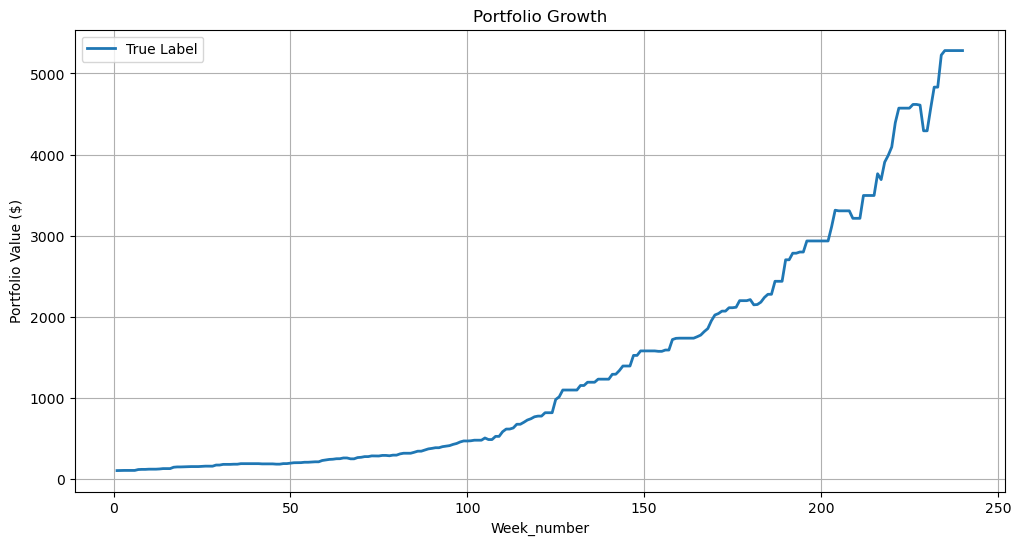

In [52]:
Week_number = AAPL_df_modified['Weeks_index'].tolist()
plt.figure(figsize=(12, 6))
plt.plot(Week_number, portfolio_values, label='True Label', linewidth=2)
plt.xlabel('Week_number')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Growth')
plt.legend()
plt.grid(True)

plt.show()

In [53]:
portfolio_values = []  
for i in range(len(SPY_df_modified)):
    if i == 0:
        balance = 100
        shares_we_have = 100 / SPY_df_modified.at[i, 'Open']
        balance = shares_we_have * SPY_df_modified.at[i, 'Close']
        portfolio_values.append(balance)
    else:
        if SPY_df_modified.at[i, 'True Label'] == '+':
            if SPY_df_modified.at[i-1, 'True Label'] == SPY_df_modified.at[i, 'True Label']:
                balance = shares_we_have * SPY_df_modified.at[i, 'Close']
                portfolio_values.append(balance)
            else:
                shares_we_have = balance / SPY_df_modified.at[i-1, 'Close']
                balance = shares_we_have * SPY_df_modified.at[i, 'Close']
                portfolio_values.append(balance)
        else:
            if SPY_df_modified.at[i-1, 'True Label'] == SPY_df_modified.at[i, 'True Label']:
                portfolio_values.append(balance)
            else:
                shares_we_have = 0   
                portfolio_values.append(balance)

In [54]:
last_number_spy = portfolio_values[-1]
last_number_spy

1089.2117707622467

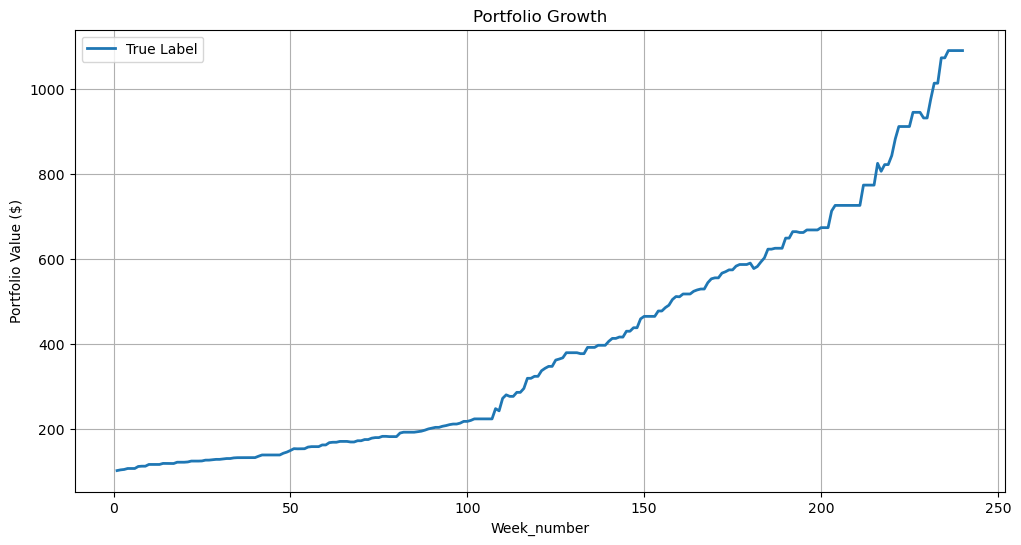

In [55]:
Week_number = SPY_df_modified['Weeks_index'].tolist()
plt.figure(figsize=(12, 6))
plt.plot(Week_number, portfolio_values, label='True Label', linewidth=2)
plt.xlabel('Week_number')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Growth')
plt.legend()
plt.grid(True)

plt.show()

In [56]:
initial_portfolio_value = 100  

buy_and_hold_shares = initial_portfolio_value / AAPL_df_modified['Open'].iloc[0]

portfolio_values_buy_and_hold = [buy_and_hold_shares * close for close in AAPL_df_modified['Close']]

In [57]:
value=portfolio_values_buy_and_hold[-1]
value

309.96708456163174

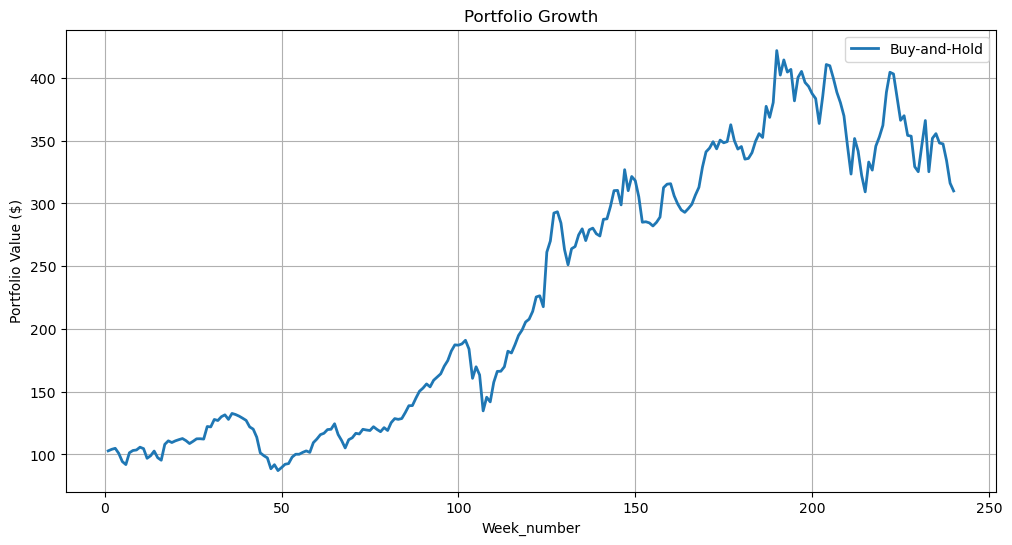

In [58]:
Week_number = AAPL_df_modified['Weeks_index'].tolist()
plt.figure(figsize=(12, 6))
plt.plot(Week_number, portfolio_values_buy_and_hold, label='Buy-and-Hold', linewidth=2)
plt.xlabel('Week_number')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Growth')
plt.legend()
plt.grid(True)

plt.show()

In [59]:
initial_portfolio_value = 100  

buy_and_hold_shares = initial_portfolio_value / SPY_df_modified['Open'].iloc[0]

portfolio_values_buy_and_hold = [buy_and_hold_shares * close for close in SPY_df_modified['Close']]

In [60]:
value_2=portfolio_values_buy_and_hold[-1]
value_2

142.96221957046828

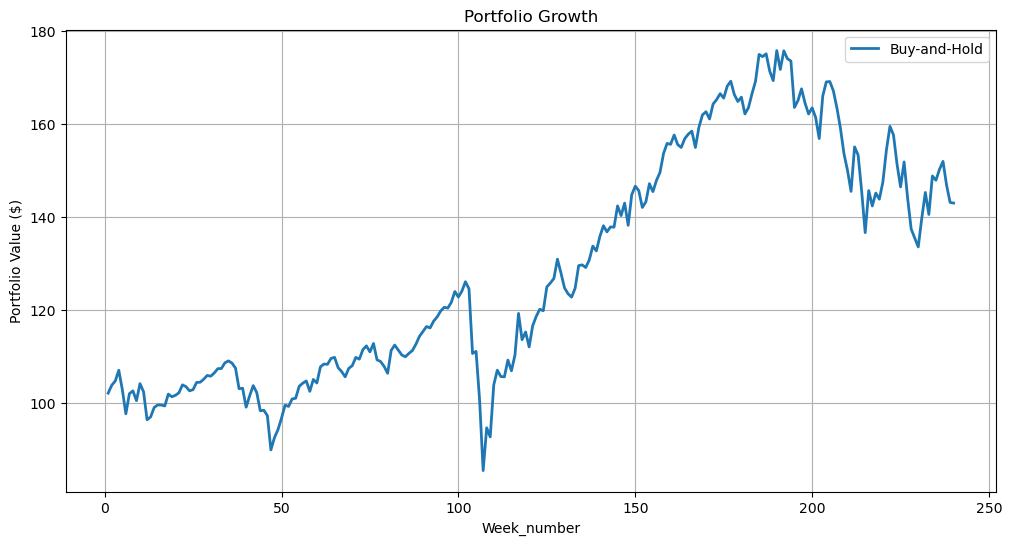

In [61]:
Week_number = SPY_df_modified['Weeks_index'].tolist()
plt.figure(figsize=(12, 6))
plt.plot(Week_number, portfolio_values_buy_and_hold, label='Buy-and-Hold', linewidth=2)
plt.xlabel('Week_number')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Growth')
plt.legend()
plt.grid(True)

plt.show()

In [62]:
AAPL_df_modified.head()

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility,True Label,Weeks_index
0,2018,1,1,42.540001,43.750000,0.39675,0.542891,+,1
1,2018,1,2,43.587502,44.272499,0.23920,0.557208,+,2
2,2018,1,3,44.474998,44.615002,0.19675,1.006506,+,3
3,2018,1,4,44.325001,42.877499,-0.78780,0.914486,-,4
4,2018,2,1,41.792500,40.125000,-1.30280,1.942396,-,5


In [63]:
growth=[]
shares= 100/AAPL_df_modified.at[0,'Open']
for i in range(len(AAPL_df_modified)):
    if AAPL_df_modified.at[i,'Month']==6 or AAPL_df_modified.at[i,'Month']==7 or (AAPL_df_modified.at[i,'Month']==8 and AAPL_df_modified.at[i, 'Week_of_Month'] in range(1,4) ):
        growth.append(balance)
    elif AAPL_df_modified.at[i,'Month']==5 and AAPL_df_modified.at[i, 'Week_of_Month']==4:
        balance=shares* AAPL_df_modified.at[i, 'Close']
        growth.append(balance)
        shares=0
    elif AAPL_df_modified.at[i,'Month']==8 and AAPL_df_modified.at[i, 'Week_of_Month']==4:
        shares=balance/AAPL_df_modified.at[i,'Close']
        growth.append(balance)
    else:
        balance= shares*AAPL_df_modified.at[i,'Close']
        growth.append(balance)
results1= growth[-1]
results1

116.99749668125361

In [64]:
growth=[]
shares= 100/SPY_df_modified.at[0,'Open']
for i in range(len(SPY_df_modified)):
    if SPY_df_modified.at[i,'Month']==6 or SPY_df_modified.at[i,'Month']==7 or (SPY_df_modified.at[i,'Month']==8 and SPY_df_modified.at[i, 'Week_of_Month'] in range(1,4) ):
        growth.append(balance)
    elif SPY_df_modified.at[i,'Month']==5 and SPY_df_modified.at[i, 'Week_of_Month']==4:
        balance=shares* SPY_df_modified.at[i, 'Close']
        growth.append(balance)
        shares=0
    elif SPY_df_modified.at[i,'Month']==8 and SPY_df_modified.at[i, 'Week_of_Month']==4:
        shares=balance/SPY_df_modified.at[i,'Close']
        growth.append(balance)
    else:
        balance= shares*SPY_df_modified.at[i,'Close']
        growth.append(balance)
results2= growth[-1]
results2

108.20840752318459

In [65]:
data = {
    "Strategy": ["Buy-and-hold", "Buy-and-hold with Summer Vacation"],
    "AAPL": [value, results1],
    "S&P-500": [value_2, results2]
}

In [66]:
returns_df = pd.DataFrame(data)
print(returns_df)

                            Strategy        AAPL     S&P-500
0                       Buy-and-hold  309.967085  142.962220
1  Buy-and-hold with Summer Vacation  116.997497  108.208408


In [67]:
monthly_results=[]
for m in range(2,13):
    shares= 100/AAPL_df_modified.at[0,'Open']
    growth=[]
    for i in range(len(AAPL_df_modified)):
        if AAPL_df_modified.at[i,'Month']==m and AAPL_df_modified.at[i, 'Week_of_Month'] in range(1,4) :
            growth.append(balance)
        elif AAPL_df_modified.at[i,'Month']== (m-1) and AAPL_df_modified.at[i, 'Week_of_Month']==4:
            balance=shares* AAPL_df_modified.at[i, 'Close']
            growth.append(balance)
            shares=0
        elif AAPL_df_modified.at[i,'Month']== m and AAPL_df_modified.at[i, 'Week_of_Month']==4:
            shares=balance/AAPL_df_modified.at[i,'Close']
            growth.append(balance)
        else:
            balance= shares*AAPL_df_modified.at[i,'Close']
            growth.append(balance)
    monthly_results.append(growth[-1])
monthly_results

[361.7397735778911,
 310.9959324658517,
 251.30009444230006,
 314.9715826600205,
 254.88975019582531,
 224.83841730004866,
 196.14842956423846,
 336.12334883422153,
 267.4137154152694,
 360.61588260107584,
 272.5695879758491]

In [68]:
s=[]
shares_jan= 100/AAPL_df_modified.at[3,'Close']
balance=100
for i in range(len(AAPL_df_modified)):
        if AAPL_df_modified.at[i,'Month']==1 and AAPL_df_modified.at[i, 'Week_of_Month'] in range(1,4) :
            s.append(balance)
        elif AAPL_df_modified.at[i,'Month']== 12 and AAPL_df_modified.at[i, 'Week_of_Month']==4:
            balance=shares_jan* AAPL_df_modified.at[i, 'Close']
            s.append(balance)
            shares_jan=0
        elif AAPL_df_modified.at[i,'Month']== 1 and AAPL_df_modified.at[i, 'Week_of_Month']==4:
            shares_jan=balance/AAPL_df_modified.at[i,'Close']
            s.append(balance)
        else:
            balance= shares_jan*AAPL_df_modified.at[i,'Close']
            s.append(balance)
results_jan= s[-1]
results_jan

286.9749792805808

In [69]:
monthly_results.insert(0,results_jan)
monthly_results

[286.9749792805808,
 361.7397735778911,
 310.9959324658517,
 251.30009444230006,
 314.9715826600205,
 254.88975019582531,
 224.83841730004866,
 196.14842956423846,
 336.12334883422153,
 267.4137154152694,
 360.61588260107584,
 272.5695879758491]

In [70]:
monthly_results2 = []
for m in range(2, 13):
    shares = 100 / SPY_df_modified.at[0, 'Open']
    growth = []
    for i in range(len(SPY_df_modified)):
        if SPY_df_modified.at[i, 'Month'] == m and SPY_df_modified.at[i, 'Week_of_Month'] in range(1, 4):
            growth.append(balance)
        elif SPY_df_modified.at[i, 'Month'] == (m - 1) and SPY_df_modified.at[i, 'Week_of_Month'] == 4:
            balance = shares * SPY_df_modified.at[i, 'Close']
            growth.append(balance)
            shares = 0
        elif SPY_df_modified.at[i, 'Month'] == m and SPY_df_modified.at[i, 'Week_of_Month'] == 4:
            shares = balance / SPY_df_modified.at[i, 'Close']
            growth.append(balance)
        else:
            balance = shares * SPY_df_modified.at[i, 'Close']
            growth.append(balance)
    monthly_results2.append(growth[-1])
monthly_results2


[154.79184597476635,
 165.1960921040868,
 119.09883293837537,
 141.6478703909831,
 141.0556765876049,
 121.2217700427508,
 129.33985822194134,
 162.44641852145034,
 135.1534357223559,
 126.84603153054219,
 147.762925344101]

In [71]:
s = []
shares_jan = 100 / SPY_df_modified.at[3, 'Close']
balance = 100
for i in range(len(SPY_df_modified)):
        if SPY_df_modified.at[i, 'Month'] == 1 and SPY_df_modified.at[i, 'Week_of_Month'] in range(1, 4):
            s.append(balance)
        elif SPY_df_modified.at[i, 'Month'] == 12 and SPY_df_modified.at[i, 'Week_of_Month'] == 4:
            balance = shares_jan * SPY_df_modified.at[i, 'Close']
            s.append(balance)
            shares_jan = 0
        elif SPY_df_modified.at[i, 'Month'] == 1 and SPY_df_modified.at[i, 'Week_of_Month'] == 4:
            shares_jan = balance / SPY_df_modified.at[i, 'Close']
            s.append(balance)
        else:
            balance = shares_jan * SPY_df_modified.at[i, 'Close']
            s.append(balance)
results2_jan = s[-1]
results2_jan


129.8630306615495

In [72]:
monthly_results2.insert(0,results2_jan)
monthly_results2

[129.8630306615495,
 154.79184597476635,
 165.1960921040868,
 119.09883293837537,
 141.6478703909831,
 141.0556765876049,
 121.2217700427508,
 129.33985822194134,
 162.44641852145034,
 135.1534357223559,
 126.84603153054219,
 147.762925344101]

In [73]:
monthly_results.insert(0,value)

In [74]:
monthly_results2.insert(0,value_2)

In [75]:
data1 = {
    "Strategy": ["Buy-and-hold", "B&H without January","B&H without February","B&H without March",
                "B&H without April", "B&H without May", "B&H without June",
                "B&H without July","B&H without August","B&H without September","B&H without October",
                "B&H without November","B&H without December"],
    "AAPL":monthly_results,
    "S&P-500":monthly_results2
}

In [76]:
returns_df_2 = pd.DataFrame(data1)
print(returns_df_2)

                 Strategy        AAPL     S&P-500
0            Buy-and-hold  309.967085  142.962220
1     B&H without January  286.974979  129.863031
2    B&H without February  361.739774  154.791846
3       B&H without March  310.995932  165.196092
4       B&H without April  251.300094  119.098833
5         B&H without May  314.971583  141.647870
6        B&H without June  254.889750  141.055677
7        B&H without July  224.838417  121.221770
8      B&H without August  196.148430  129.339858
9   B&H without September  336.123349  162.446419
10    B&H without October  267.413715  135.153436
11   B&H without November  360.615883  126.846032
12   B&H without December  272.569588  147.762925


In [77]:
AAPL_df_modified.head()

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility,True Label,Weeks_index
0,2018,1,1,42.540001,43.750000,0.39675,0.542891,+,1
1,2018,1,2,43.587502,44.272499,0.23920,0.557208,+,2
2,2018,1,3,44.474998,44.615002,0.19675,1.006506,+,3
3,2018,1,4,44.325001,42.877499,-0.78780,0.914486,-,4
4,2018,2,1,41.792500,40.125000,-1.30280,1.942396,-,5


In [78]:
import random
pro=[x/10.0 for x in range(11)]
for p in pro:
    predicted_labels=[]
    for i in range(len(AAPL_df_modified)):
        random_number = random.random()
        if random_number <= p:
            predicted_labels.append(AAPL_df_modified.at[i, 'True Label'])
        else:
            if AAPL_df_modified.at[i, 'True Label']=='+':
                predicted_labels.append('-')
            else:
                predicted_labels.append('+')
    AAPL_df_modified[f'Predicted Label p={p}'] = predicted_labels
                

In [79]:
AAPL_df_modified.head()

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility,True Label,Weeks_index,Predicted Label p=0.0,Predicted Label p=0.1,Predicted Label p=0.2,Predicted Label p=0.3,Predicted Label p=0.4,Predicted Label p=0.5,Predicted Label p=0.6,Predicted Label p=0.7,Predicted Label p=0.8,Predicted Label p=0.9,Predicted Label p=1.0
0,2018,1,1,42.540001,43.750000,0.39675,0.542891,+,1,-,-,-,-,+,+,+,+,+,+,+
1,2018,1,2,43.587502,44.272499,0.23920,0.557208,+,2,-,-,-,-,-,-,-,+,+,+,+
2,2018,1,3,44.474998,44.615002,0.19675,1.006506,+,3,-,-,-,-,-,+,+,+,-,+,+
3,2018,1,4,44.325001,42.877499,-0.78780,0.914486,-,4,+,+,+,+,+,+,-,+,-,+,-
4,2018,2,1,41.792500,40.125000,-1.30280,1.942396,-,5,+,+,-,+,-,+,+,-,-,-,-


In [80]:
def compute_portfolio_values(df, label_col):
    portfolio_values = []
    for i in range(len(df)):
        if i==0:
            if df.at[i, label_col]=='+':
                balance = 100
                shares_we_have = 100 / df.at[i, 'Open']
                balance = shares_we_have * df.at[i, 'Close']
                portfolio_values.append(balance)
            else:
                balance=100
                portfolio_values.append(balance)
                
        else:
            if df.at[i, label_col] == '+':
                if df.at[i-1, label_col] == df.at[i, label_col]:
                    balance = shares_we_have * df.at[i, 'Close']
                    portfolio_values.append(balance)
                else:
                    shares_we_have = balance / df.at[i-1, 'Close']
                    balance = shares_we_have * df.at[i, 'Close']
                    portfolio_values.append(balance)
            else:
                if df.at[i-1, label_col] == df.at[i, label_col]:
                    portfolio_values.append(balance)
                else:
                    shares_we_have = 0
                    portfolio_values.append(balance)
    return portfolio_values[-1]

label_columns = ['Predicted Label p=0.0', 'Predicted Label p=0.1','Predicted Label p=0.2',
                'Predicted Label p=0.3','Predicted Label p=0.4','Predicted Label p=0.5',
                'Predicted Label p=0.6','Predicted Label p=0.7','Predicted Label p=0.8',
                'Predicted Label p=0.9','Predicted Label p=1.0'] 

all_portfolio_values_aapl = {}
for label_col in label_columns:
    all_portfolio_values_aapl[label_col] = compute_portfolio_values(AAPL_df_modified, label_col)
all_portfolio_values_aapl


{'Predicted Label p=0.0': 5.86892338466716,
 'Predicted Label p=0.1': 7.921856096503982,
 'Predicted Label p=0.2': 16.350804232625997,
 'Predicted Label p=0.3': 48.956000891782516,
 'Predicted Label p=0.4': 54.09187780408432,
 'Predicted Label p=0.5': 179.34936181700292,
 'Predicted Label p=0.6': 679.3545608484701,
 'Predicted Label p=0.7': 642.0903062532873,
 'Predicted Label p=0.8': 1696.2362407161588,
 'Predicted Label p=0.9': 2000.97928922164,
 'Predicted Label p=1.0': 5281.4982279618}

In [81]:
pro=[x/10.0 for x in range(11)]
for p in pro:
    predicted_labels=[]
    for i in range(len(SPY_df_modified)):
        random_number = random.random()
        if random_number <= p:
            predicted_labels.append(SPY_df_modified.at[i, 'True Label'])
        else:
            if SPY_df_modified.at[i, 'True Label']=='+':
                predicted_labels.append('-')
            else:
                predicted_labels.append('+')
    SPY_df_modified[f'Predicted Label p={p}'] = predicted_labels

In [82]:
SPY_df_modified.head()

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility,True Label,Weeks_index,Predicted Label p=0.0,Predicted Label p=0.1,Predicted Label p=0.2,Predicted Label p=0.3,Predicted Label p=0.4,Predicted Label p=0.5,Predicted Label p=0.6,Predicted Label p=0.7,Predicted Label p=0.8,Predicted Label p=0.9,Predicted Label p=1.0
0,2018,1,1,267.839996,273.420013,0.4300,0.306532,+,1,-,-,+,+,-,+,-,+,-,+,+
1,2018,1,2,273.309998,277.920013,0.3276,0.363789,+,2,-,-,+,-,+,+,+,+,+,+,+
2,2018,1,3,279.350006,280.410004,0.2245,0.594088,+,3,-,-,-,+,-,-,-,-,+,+,+
3,2018,1,4,280.170013,286.579987,0.4372,0.523078,+,4,-,-,-,+,-,+,+,-,+,+,+
4,2018,2,1,281.070007,275.450012,-0.7860,0.888551,-,5,+,+,+,-,-,-,-,-,+,-,-


In [83]:
all_portfolio_values_spy = {}
for label_col in label_columns:
    all_portfolio_values_spy[label_col] = compute_portfolio_values(SPY_df_modified, label_col)
all_portfolio_values_spy

{'Predicted Label p=0.0': 13.125291463791404,
 'Predicted Label p=0.1': 17.11389152004483,
 'Predicted Label p=0.2': 31.963849417404916,
 'Predicted Label p=0.3': 67.4840173792107,
 'Predicted Label p=0.4': 86.16556440643913,
 'Predicted Label p=0.5': 84.69714504146263,
 'Predicted Label p=0.6': 148.3842641872108,
 'Predicted Label p=0.7': 343.3857957448542,
 'Predicted Label p=0.8': 418.795281325531,
 'Predicted Label p=0.9': 760.9459109478453,
 'Predicted Label p=1.0': 1089.2117707622467}

In [84]:
def insert_at_start(original_dict, key, value):
    new_dict = {} 
    new_dict[key] = value 
    new_dict.update(original_dict)
    return new_dict
new_dic_aapl=insert_at_start(all_portfolio_values_aapl, 'Buy-and-hold', value)
new_dic_aapl

{'Buy-and-hold': 309.96708456163174,
 'Predicted Label p=0.0': 5.86892338466716,
 'Predicted Label p=0.1': 7.921856096503982,
 'Predicted Label p=0.2': 16.350804232625997,
 'Predicted Label p=0.3': 48.956000891782516,
 'Predicted Label p=0.4': 54.09187780408432,
 'Predicted Label p=0.5': 179.34936181700292,
 'Predicted Label p=0.6': 679.3545608484701,
 'Predicted Label p=0.7': 642.0903062532873,
 'Predicted Label p=0.8': 1696.2362407161588,
 'Predicted Label p=0.9': 2000.97928922164,
 'Predicted Label p=1.0': 5281.4982279618}

In [85]:
new_dic_spy=insert_at_start(all_portfolio_values_spy, 'Buy-and-hold', value_2)
new_dic_spy

{'Buy-and-hold': 142.96221957046828,
 'Predicted Label p=0.0': 13.125291463791404,
 'Predicted Label p=0.1': 17.11389152004483,
 'Predicted Label p=0.2': 31.963849417404916,
 'Predicted Label p=0.3': 67.4840173792107,
 'Predicted Label p=0.4': 86.16556440643913,
 'Predicted Label p=0.5': 84.69714504146263,
 'Predicted Label p=0.6': 148.3842641872108,
 'Predicted Label p=0.7': 343.3857957448542,
 'Predicted Label p=0.8': 418.795281325531,
 'Predicted Label p=0.9': 760.9459109478453,
 'Predicted Label p=1.0': 1089.2117707622467}

In [86]:
df_p = pd.DataFrame({"AAPL": new_dic_aapl, "SPY": new_dic_spy})
df_p

,AAPL,SPY
Buy-and-hold,309.967085,142.962220
Predicted Label p=0.0,5.868923,13.125291
Predicted Label p=0.1,7.921856,17.113892
Predicted Label p=0.2,16.350804,31.963849
Predicted Label p=0.3,48.956001,67.484017
Predicted Label p=0.4,54.091878,86.165564
Predicted Label p=0.5,179.349362,84.697145
Predicted Label p=0.6,679.354561,148.384264
Predicted Label p=0.7,642.090306,343.385796
Predicted Label p=0.8,1696.236241,418.795281


In [87]:
AAPL_df_modified_angry=AAPL_df_modified[(AAPL_df_modified['Year']==2021) | (AAPL_df_modified['Year']==2022) ]
AAPL_df_modified_angry.reset_index(drop=True, inplace=True)
AAPL_df_modified_angry.head(10)

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility,True Label,Weeks_index,Predicted Label p=0.0,Predicted Label p=0.1,Predicted Label p=0.2,Predicted Label p=0.3,Predicted Label p=0.4,Predicted Label p=0.5,Predicted Label p=0.6,Predicted Label p=0.7,Predicted Label p=0.8,Predicted Label p=0.9,Predicted Label p=1.0
0,2021,1,1,133.520004,132.050003,1.03780,3.123115,-,145,+,-,+,+,+,+,-,+,+,-,-
1,2021,1,2,129.190002,127.139999,0.15120,2.211689,-,146,+,+,+,-,+,-,-,+,-,-,-
2,2021,1,3,127.779999,139.070007,0.71060,2.296290,+,147,-,-,-,-,-,+,+,+,+,-,+
3,2021,1,4,143.070007,131.960007,0.39540,3.490233,-,148,+,+,+,+,+,+,-,-,-,+,-
4,2021,2,1,133.750000,136.759995,-0.67020,1.379075,+,149,-,-,-,+,+,+,+,+,-,+,+
5,2021,2,2,136.029999,135.369995,-1.03440,3.969262,-,150,+,-,+,-,-,+,-,-,-,-,-
6,2021,2,3,135.490005,129.869995,1.79420,1.971979,-,151,+,-,+,+,-,+,+,-,-,-,-
7,2021,2,4,128.009995,121.260002,0.10900,1.822563,-,152,+,+,+,+,+,+,+,+,-,-,-
8,2021,3,1,123.750000,121.419998,-0.32040,0.946634,-,153,+,+,+,+,-,-,+,-,-,-,-
9,2021,3,2,120.930000,121.029999,-0.14625,1.905579,+,154,-,-,+,-,-,+,-,+,+,+,+


In [88]:
AAPL_df_modified_angry_1=AAPL_df_modified_angry.copy()

In [89]:
AAPL_df_modified_angry_1['price difference']=AAPL_df_modified_angry_1['Close']-AAPL_df_modified_angry_1['Open']

In [90]:
top_10_best_return = AAPL_df_modified_angry_1.nlargest(10, 'price difference')
top_10_best_return

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility,True Label,Weeks_index,Predicted Label p=0.0,...,Predicted Label p=0.2,Predicted Label p=0.3,Predicted Label p=0.4,Predicted Label p=0.5,Predicted Label p=0.6,Predicted Label p=0.7,Predicted Label p=0.8,Predicted Label p=0.9,Predicted Label p=1.0,price difference
45,2021,12,2,164.289993,179.449997,0.07020,0.696021,+,190,-,...,-,-,-,+,-,+,+,+,+,15.160004
89,2022,11,2,137.110001,149.699997,-1.13620,2.501043,+,234,-,...,-,-,-,-,+,+,+,+,+,12.589996
58,2022,3,3,151.449997,163.979996,0.22780,0.665820,+,203,-,...,-,-,-,+,+,+,+,+,+,12.529999
67,2022,5,4,137.789993,149.639999,-0.59980,1.995778,+,212,-,...,-,-,-,-,+,+,+,+,+,11.850006
2,2021,1,3,127.779999,139.070007,0.71060,2.296290,+,147,-,...,-,-,-,+,+,+,+,-,+,11.290009
59,2022,3,4,163.509995,174.720001,-0.16500,1.220756,+,204,-,...,+,-,+,+,-,-,-,+,+,11.210007
51,2022,1,4,160.020004,170.330002,-0.38980,1.009416,+,196,-,...,-,-,+,+,+,+,+,-,+,10.309998
42,2021,11,3,150.369995,160.550003,0.18440,1.468083,+,187,-,...,-,+,+,-,+,+,+,-,+,10.180008
73,2022,7,2,137.770004,147.039993,-0.14900,1.634620,+,218,-,...,-,+,+,-,+,-,+,+,+,9.269989
13,2021,4,2,123.870003,133.000000,1.03975,1.459982,+,158,-,...,-,-,-,+,+,-,+,+,+,9.129997


In [91]:
def modify_labels(df, indexes_to_modify):
    df['10_best'] = df['True Label'].copy()
    
    for idx in indexes_to_modify:
        if df.loc[idx, 'True Label'] == '+':
            df.loc[idx, '10_best'] = '-'
        else:
            df.loc[idx, '10_best'] = '+'
    
    return df
modified_sample_aapl = modify_labels(AAPL_df_modified_angry_1, [45,89,58,67,2,59,51,42,73,13])
modified_sample_aapl.head()

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility,True Label,Weeks_index,Predicted Label p=0.0,...,Predicted Label p=0.3,Predicted Label p=0.4,Predicted Label p=0.5,Predicted Label p=0.6,Predicted Label p=0.7,Predicted Label p=0.8,Predicted Label p=0.9,Predicted Label p=1.0,price difference,10_best
0,2021,1,1,133.520004,132.050003,1.0378,3.123115,-,145,+,...,+,+,+,-,+,+,-,-,-1.470001,-
1,2021,1,2,129.190002,127.139999,0.1512,2.211689,-,146,+,...,-,+,-,-,+,-,-,-,-2.050003,-
2,2021,1,3,127.779999,139.070007,0.7106,2.296290,+,147,-,...,-,-,+,+,+,+,-,+,11.290009,-
3,2021,1,4,143.070007,131.960007,0.3954,3.490233,-,148,+,...,+,+,+,-,-,-,+,-,-11.110001,-
4,2021,2,1,133.750000,136.759995,-0.6702,1.379075,+,149,-,...,+,+,+,+,+,-,+,+,3.009995,+


In [92]:
ten_best_result = compute_portfolio_values(modified_sample_aapl, '10_best')
ten_best_result

183.24304360747942

In [93]:
bottom_10_worst_return = AAPL_df_modified_angry_1.nsmallest(10, 'price difference')
bottom_10_worst_return

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility,True Label,Weeks_index,Predicted Label p=0.0,...,Predicted Label p=0.3,Predicted Label p=0.4,Predicted Label p=0.5,Predicted Label p=0.6,Predicted Label p=0.7,Predicted Label p=0.8,Predicted Label p=0.9,Predicted Label p=1.0,price difference,10_best
88,2022,11,1,155.080002,138.380005,-0.69925,2.311745,-,233,+,...,+,-,+,-,-,-,-,-,-16.699997,-
3,2021,1,4,143.070007,131.960007,0.39540,3.490233,-,148,+,...,+,+,+,-,-,-,+,-,-11.110001,-
46,2021,12,3,181.119995,171.139999,0.40560,0.956122,-,191,+,...,-,+,+,+,-,-,-,-,-9.979996,-
69,2022,6,2,147.029999,137.130005,-1.57575,0.502237,-,214,+,...,+,-,+,-,-,-,-,-,-9.899994,-
50,2022,1,3,171.509995,162.410004,-0.86000,1.988585,-,195,+,...,+,+,+,+,+,-,-,-,-9.099991,-
82,2022,9,3,159.589996,150.699997,-0.41800,1.509899,-,227,+,...,-,+,+,-,-,+,-,-,-8.889999,-
57,2022,3,2,163.360001,154.729996,0.15840,1.559451,-,202,+,...,+,+,-,-,-,-,-,-,-8.630005,-
94,2022,12,3,142.699997,134.509995,0.42920,1.350356,-,239,+,...,-,-,+,-,-,-,-,-,-8.190002,-
66,2022,5,3,145.550003,137.589996,0.15160,1.230346,-,211,+,...,+,+,+,+,+,-,-,-,-7.960007,-
65,2022,5,2,154.929993,147.110001,0.74825,1.230668,-,210,+,...,+,+,-,+,+,-,-,-,-7.819992,-


In [94]:
modified_sample_aapl_worst = modify_labels(AAPL_df_modified_angry_1, [88,3,46,69,50,82,57,94,66,65])
modified_sample_aapl_worst.head()

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility,True Label,Weeks_index,Predicted Label p=0.0,...,Predicted Label p=0.3,Predicted Label p=0.4,Predicted Label p=0.5,Predicted Label p=0.6,Predicted Label p=0.7,Predicted Label p=0.8,Predicted Label p=0.9,Predicted Label p=1.0,price difference,10_best
0,2021,1,1,133.520004,132.050003,1.0378,3.123115,-,145,+,...,+,+,+,-,+,+,-,-,-1.470001,-
1,2021,1,2,129.190002,127.139999,0.1512,2.211689,-,146,+,...,-,+,-,-,+,-,-,-,-2.050003,-
2,2021,1,3,127.779999,139.070007,0.7106,2.296290,+,147,-,...,-,-,+,+,+,+,-,+,11.290009,+
3,2021,1,4,143.070007,131.960007,0.3954,3.490233,-,148,+,...,+,+,+,-,-,-,+,-,-11.110001,+
4,2021,2,1,133.750000,136.759995,-0.6702,1.379075,+,149,-,...,+,+,+,+,+,-,+,+,3.009995,+


In [95]:
ten_worst_result = compute_portfolio_values(modified_sample_aapl_worst, '10_best')
ten_worst_result

202.9322119678277

In [96]:
modified_sample_aapl_worst_best = modify_labels(AAPL_df_modified_angry_1, [45,89,58,67,2,88,3,46,69,50])

In [97]:
best_worst_result = compute_portfolio_values(modified_sample_aapl_worst_best, '10_best')
best_worst_result

178.52558611469001

In [98]:
SPY_df_modified_angry=SPY_df_modified[(SPY_df_modified['Year']==2021) | (SPY_df_modified['Year']==2022) ]
SPY_df_modified_angry.reset_index(drop=True, inplace=True)
SPY_df_modified_angry.head(10)

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility,True Label,Weeks_index,Predicted Label p=0.0,Predicted Label p=0.1,Predicted Label p=0.2,Predicted Label p=0.3,Predicted Label p=0.4,Predicted Label p=0.5,Predicted Label p=0.6,Predicted Label p=0.7,Predicted Label p=0.8,Predicted Label p=0.9,Predicted Label p=1.0
0,2021,1,1,375.309998,381.260010,-0.10600,1.603329,+,145,-,-,+,+,-,-,+,+,+,+,+
1,2021,1,2,377.850006,375.700012,0.31340,1.055009,-,146,+,+,-,-,-,-,-,+,-,-,-
2,2021,1,3,378.339996,382.880005,0.77420,1.302134,+,147,-,-,-,-,-,-,-,-,+,+,+
3,2021,1,4,383.670013,370.070007,0.02880,0.925271,-,148,+,+,+,-,+,+,-,+,-,-,-
4,2021,2,1,373.720001,387.709991,-0.08380,0.849825,+,149,-,-,-,-,-,+,+,-,+,+,+
5,2021,2,2,389.269989,392.640015,-1.12740,1.656783,+,150,-,-,-,-,+,+,+,+,+,+,+
6,2021,2,3,393.959991,390.029999,1.40980,0.899440,-,151,+,+,+,+,+,-,+,-,-,-,-
7,2021,2,4,387.059998,380.359985,0.45340,0.997773,-,152,+,+,+,+,+,-,-,-,+,-,-
8,2021,3,1,385.589996,383.630005,-0.15140,0.978010,-,153,+,+,+,-,-,+,-,-,-,+,-
9,2021,3,2,384.660004,394.059998,0.58375,0.751138,+,154,-,-,+,+,-,-,+,-,+,+,+


In [99]:
SPY_df_modified_angry_1=SPY_df_modified_angry.copy()

In [100]:
SPY_df_modified_angry_1['price difference']=SPY_df_modified_angry_1['Close']-SPY_df_modified_angry_1['Open']

In [101]:
top_10_best_return_SPY = SPY_df_modified_angry_1.nlargest(10, 'price difference')
top_10_best_return_SPY

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility,True Label,Weeks_index,Predicted Label p=0.0,...,Predicted Label p=0.2,Predicted Label p=0.3,Predicted Label p=0.4,Predicted Label p=0.5,Predicted Label p=0.6,Predicted Label p=0.7,Predicted Label p=0.8,Predicted Label p=0.9,Predicted Label p=1.0,price difference
58,2022,3,3,420.890015,444.519989,0.40100,0.161529,+,203,-,...,-,-,-,-,-,+,-,+,+,23.629974
67,2022,5,4,392.829987,415.260010,-0.37280,0.934446,+,212,-,...,+,-,-,+,-,+,+,+,+,22.430023
89,2022,11,2,377.709991,398.510010,-1.02040,1.662263,+,234,-,...,+,+,-,-,-,+,+,+,+,20.800018
71,2022,6,4,371.890015,390.079987,0.31360,1.572823,+,216,-,...,+,-,-,+,+,-,+,+,+,18.189972
47,2021,12,4,454.480011,470.600006,-0.11300,0.754716,+,192,-,...,-,+,-,-,-,-,+,+,+,16.119995
45,2021,12,2,456.130005,470.739990,0.18200,0.550239,+,190,-,...,-,-,-,-,-,+,+,+,+,14.609985
4,2021,2,1,373.720001,387.709991,-0.08380,0.849825,+,149,-,...,-,-,-,+,+,-,+,+,+,13.989990
27,2021,7,4,426.190002,439.940002,0.29225,0.594870,+,172,-,...,-,-,-,-,-,+,+,+,+,13.750000
81,2022,9,2,393.130005,406.600006,-0.54500,1.255823,+,226,-,...,-,-,-,-,-,-,+,+,+,13.470001
87,2022,10,4,375.890015,389.019989,1.28880,1.282234,+,232,-,...,-,-,+,+,-,+,+,+,+,13.129974


In [102]:
modified_sample_SPY = modify_labels(SPY_df_modified_angry_1, [58,67,89,71,47,45,4,27,81,87])
modified_sample_SPY.head()

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility,True Label,Weeks_index,Predicted Label p=0.0,...,Predicted Label p=0.3,Predicted Label p=0.4,Predicted Label p=0.5,Predicted Label p=0.6,Predicted Label p=0.7,Predicted Label p=0.8,Predicted Label p=0.9,Predicted Label p=1.0,price difference,10_best
0,2021,1,1,375.309998,381.260010,-0.1060,1.603329,+,145,-,...,+,-,-,+,+,+,+,+,5.950012,+
1,2021,1,2,377.850006,375.700012,0.3134,1.055009,-,146,+,...,-,-,-,-,+,-,-,-,-2.149994,-
2,2021,1,3,378.339996,382.880005,0.7742,1.302134,+,147,-,...,-,-,-,-,-,+,+,+,4.540009,+
3,2021,1,4,383.670013,370.070007,0.0288,0.925271,-,148,+,...,-,+,+,-,+,-,-,-,-13.600006,-
4,2021,2,1,373.720001,387.709991,-0.0838,0.849825,+,149,-,...,-,-,+,+,-,+,+,+,13.989990,-


In [103]:
ten_best_result_SPY = compute_portfolio_values(modified_sample_SPY, '10_best')
ten_best_result_SPY

165.37638590841576

In [104]:
bottom_10_worst_return_SPY = SPY_df_modified_angry_1.nsmallest(10, 'price difference')
bottom_10_worst_return_SPY

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility,True Label,Weeks_index,Predicted Label p=0.0,...,Predicted Label p=0.3,Predicted Label p=0.4,Predicted Label p=0.5,Predicted Label p=0.6,Predicted Label p=0.7,Predicted Label p=0.8,Predicted Label p=0.9,Predicted Label p=1.0,price difference,10_best
69,2022,6,2,414.779999,389.799988,-1.46975,0.466206,-,214,+,...,+,+,+,-,-,+,-,-,-24.980011,-
82,2022,9,3,408.779999,385.559998,-0.53160,1.655576,-,227,+,...,+,-,+,-,-,-,-,-,-23.220001,-
50,2022,1,3,459.739990,437.980011,-0.42400,0.275725,-,195,+,...,+,+,-,-,-,-,-,-,-21.759979,-
83,2022,9,4,382.260010,367.950012,-0.64100,2.587898,-,228,+,...,-,-,+,-,-,-,-,-,-14.309998,-
70,2022,6,3,379.850006,365.859985,0.18860,1.411640,-,215,+,...,-,-,-,+,-,-,+,-,-13.990021,-
88,2022,11,1,390.140015,376.350006,-0.27675,1.525444,-,233,+,...,+,+,+,-,-,+,-,-,-13.790009,-
3,2021,1,4,383.670013,370.070007,0.02880,0.925271,-,148,+,...,-,+,+,-,+,-,-,-,-13.600006,-
43,2021,11,4,470.890015,458.970001,0.40080,1.139127,-,188,+,...,-,+,+,-,-,+,-,-,-11.920013,-
79,2022,8,4,417.049988,405.309998,0.01500,1.102708,-,224,+,...,+,+,+,+,-,-,-,-,-11.739990,-
57,2022,3,2,431.549988,420.070007,0.27020,0.524175,-,202,+,...,+,+,-,+,-,-,-,-,-11.479980,-


In [105]:
modified_sample_SPY_worst = modify_labels(SPY_df_modified_angry_1, [69,82,50,83,70,88,3,43,79,57])
modified_sample_SPY_worst.head()

,Year,Month,Week_of_Month,Open,Close,mean_return,volatility,True Label,Weeks_index,Predicted Label p=0.0,...,Predicted Label p=0.3,Predicted Label p=0.4,Predicted Label p=0.5,Predicted Label p=0.6,Predicted Label p=0.7,Predicted Label p=0.8,Predicted Label p=0.9,Predicted Label p=1.0,price difference,10_best
0,2021,1,1,375.309998,381.260010,-0.1060,1.603329,+,145,-,...,+,-,-,+,+,+,+,+,5.950012,+
1,2021,1,2,377.850006,375.700012,0.3134,1.055009,-,146,+,...,-,-,-,-,+,-,-,-,-2.149994,-
2,2021,1,3,378.339996,382.880005,0.7742,1.302134,+,147,-,...,-,-,-,-,-,+,+,+,4.540009,+
3,2021,1,4,383.670013,370.070007,0.0288,0.925271,-,148,+,...,-,+,+,-,+,-,-,-,-13.600006,+
4,2021,2,1,373.720001,387.709991,-0.0838,0.849825,+,149,-,...,-,-,+,+,-,+,+,+,13.989990,+


In [106]:
ten_worst_result_SPY = compute_portfolio_values(modified_sample_SPY_worst, '10_best')
ten_worst_result_SPY

167.21157650333714

In [107]:
modified_sample_SPY_worst_best = modify_labels(SPY_df_modified_angry_1, [58,67,89,71,47,69,82,50,83,70])

In [108]:
best_worst_result_SPY = compute_portfolio_values(modified_sample_SPY_worst_best, '10_best')
best_worst_result_SPY

150.23589857415422

In [109]:
data_best_worst={'Strategy':['Buy-and-hold (B&H)', 'Your True labels', 'p=1(never lose)', 'missed 10 best weeks', 'invested during 10 worst weeks', 'missed 5 best weeks and invested during 5 worst weeks'],
                 'AAPL':[value,last_number_aapl,last_number_aapl,ten_best_result,ten_worst_result,best_worst_result],
                 'SPY':[value_2,last_number_spy,last_number_spy,ten_best_result_SPY,ten_worst_result_SPY,best_worst_result_SPY]
    
}

In [110]:
df_final = pd.DataFrame(data_best_worst)
df_final

,Strategy,AAPL,SPY
0,Buy-and-hold (B&H),309.967085,142.962220
1,Your True labels,5281.498228,1089.211771
2,p=1(never lose),5281.498228,1089.211771
3,missed 10 best weeks,183.243044,165.376386
4,invested during 10 worst weeks,202.932212,167.211577
5,missed 5 best weeks and invested during 5 wors...,178.525586,150.235899
